### Heroes Of Pymoli Data Analysis

-----

In [5]:
import pandas as pd
import numpy as np

# File to Load 
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.head(20)

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
5,5,Yalae81,22,Male,81,Dreamkiss,3.61
6,6,Itheria73,36,Male,169,"Interrogator, Blood Blade of the Queen",2.18
7,7,Iskjaskst81,20,Male,162,Abyssal Shard,2.67
8,8,Undjask33,22,Male,21,Souleater,1.10
9,9,Chanosian48,35,Other / Non-Disclosed,136,Ghastly Adamantite Protector,3.58


## Player Count

* Display the total number of players


In [6]:
Total_Players=purchase_data['SN'].nunique()
Total_Players= {'Total_Players':Total_Players}
df = pd.DataFrame(Total_Players,index=[0])
df

,Total_Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [7]:
#calculations to obtain the values of Number_of_Unique_Items,Average_price,Number_of_Purchases,Total_Revenue
Number_of_Unique_Items=purchase_data['Item ID'].nunique()
Number_of_Unique_Items

183

In [9]:
Average_Price='$'+str(purchase_data['Price'].mean().round(2))
Average_Price

'$3.05'

In [8]:
Number_of_Purchases=purchase_data['Purchase ID'].count()
Number_of_Purchases

780

In [10]:
Total_Revenue='$'+str(purchase_data['Price'].sum())
Total_Revenue

'$2379.77'

In [11]:
#creating a new dataframe for the calculated values
Purchasing_Analysis={'Number_of_Unique_Items' : [Number_of_Unique_Items], 'Average_price': [Average_Price],
                   'Number_of_Purchases':[Number_of_Purchases],'Total_Revenue':[Total_Revenue]}
Purchasing_Analysis_df = pd.DataFrame(Purchasing_Analysis)
Purchasing_Analysis_df

,Number_of_Unique_Items,Average_price,Number_of_Purchases,Total_Revenue
0,183,$3.05,780,$2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [12]:
#Calculating count of players according to their gender
Total_Count=purchase_data.groupby(['Gender'])['SN'].nunique()
Total_Count

Gender
Female                    81
Male                     484
Other / Non-Disclosed     11
Name: SN, dtype: int64

In [13]:
#Calculating percentage of players according to their gender
Total_Count['%'] = purchase_data.groupby(['Gender'])['SN'].nunique()/purchase_data['SN'].nunique()*100
Percentage_of_Players=Total_Count['%'].round(2)
Percentage_of_Players

Gender
Female                   14.06
Male                     84.03
Other / Non-Disclosed     1.91
Name: SN, dtype: float64

In [14]:
#creating a new dataframe for the calculated values
gender_Demographics_df=purchase_data.groupby('Gender').agg(Total_Count=('SN','nunique'))
gender_Demographics_df['Percentage_of_Players'] = Percentage_of_Players
#Percentage_of_Players=Percentage_of_Players.map("{:,.2f}%".format)
gender_Demographics_df 


,Total_Count,Percentage_of_Players
Gender,,
Female,81,14.06
Male,484,84.03
Other / Non-Disclosed,11,1.91



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [15]:
Purchase_Count=purchase_data.groupby(['Gender'])['SN'].count()
Purchase_Count

Gender
Female                   113
Male                     652
Other / Non-Disclosed     15
Name: SN, dtype: int64

In [16]:
Average_Purchase_Price =purchase_data.groupby(['Gender'])['Price'].mean().round(2)
Average_Purchase_Price

Gender
Female                   3.20
Male                     3.02
Other / Non-Disclosed    3.35
Name: Price, dtype: float64

In [17]:
Total_Purchase_Value = purchase_data.groupby(['Gender'])['Price'].sum()
Total_Purchase_Value

Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64

In [18]:
Avg_Total_Purchase_per_Person_1=purchase_data.groupby(['Gender'])['Price'].sum()/purchase_data.groupby(['Gender'])['SN'].nunique()
Avg_Total_Purchase_per_Person = Avg_Total_Purchase_per_Person_1.round(2)
Avg_Total_Purchase_per_Person

Gender
Female                   4.47
Male                     4.07
Other / Non-Disclosed    4.56
dtype: float64

In [19]:
#creating dataframe for Purchasing Analysis (Gender)
Purchasing_Analysis_df=pd.DataFrame(purchase_data.groupby(['Gender']).agg(Purchase_Count=('Purchase ID', 'nunique')))
Purchasing_Analysis_df['Average_Purchase_Price']=Average_Purchase_Price
Purchasing_Analysis_df['Total_Purchase_Value']=Total_Purchase_Value
Purchasing_Analysis_df['Avg_Total_Purchase_per_Person']=Avg_Total_Purchase_per_Person
Purchasing_Analysis_df
Purchasing_Analysis_df.style.format({'Average_Purchase_Price':"${:,.2f}",'Total_Purchase_Value':"${:,.2f}",'Avg_Total_Purchase_per_Person': "${:,.2f}"})

,Purchase_Count,Average_Purchase_Price,Total_Purchase_Value,Avg_Total_Purchase_per_Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [20]:
#Establishing bins for ages
age_bins = [0,9,14,19,24,29,34,39,50]
age_groups = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+']
pd.cut(purchase_data['Age'],age_bins,labels= age_groups)

0      20-24
1        40+
2      20-24
3      20-24
4      20-24
       ...  
775    20-24
776    20-24
777    20-24
778      <10
779    20-24
Name: Age, Length: 780, dtype: category
Categories (8, object): ['<10' < '10-14' < '15-19' < '20-24' < '25-29' < '30-34' < '35-39' < '40+']

In [21]:
#Adding age groups column in purchase data
purchase_data['Age_Groups']=pd.cut(purchase_data['Age'],age_bins,labels= age_groups)
purchase_data

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age_Groups
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,40+
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24
...,...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,3.54,20-24
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63,20-24
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46,20-24
778,778,Sisur91,7,Male,101,Final Critic,4.19,<10


In [22]:
groupby_age=purchase_data.groupby('Age_Groups')['SN']
TotalCount=groupby_age.nunique()
TotalCount

Age_Groups
<10       17
10-14     22
15-19    107
20-24    258
25-29     77
30-34     52
35-39     31
40+       12
Name: SN, dtype: int64

In [23]:
Percentage_of_Players1=groupby_age.nunique()/purchase_data['SN'].nunique()*100
Percentage_of_Players=Percentage_of_Players1.round(2)
Percentage_of_Players

Age_Groups
<10       2.95
10-14     3.82
15-19    18.58
20-24    44.79
25-29    13.37
30-34     9.03
35-39     5.38
40+       2.08
Name: SN, dtype: float64

In [24]:
#Creating a summary data frame to hold the results
Age_Demographics_df=purchase_data.groupby('Age_Groups').agg(TotalCount=('SN','nunique'))
Age_Demographics_df['Percentage_of_Players']=Percentage_of_Players
Age_Demographics_df
#Displaying Age Demographics Table

,TotalCount,Percentage_of_Players
Age_Groups,,
<10,17,2.95
10-14,22,3.82
15-19,107,18.58
20-24,258,44.79
25-29,77,13.37
30-34,52,9.03
35-39,31,5.38
40+,12,2.08


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [25]:
#Bin the purchase_data data frame by age
age_bins = [0,9,14,19,24,29,34,39,50]
age_groups = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+']
pd.cut(purchase_data['Age'],age_bins,labels= age_groups)

0      20-24
1        40+
2      20-24
3      20-24
4      20-24
       ...  
775    20-24
776    20-24
777    20-24
778      <10
779    20-24
Name: Age, Length: 780, dtype: category
Categories (8, object): ['<10' < '10-14' < '15-19' < '20-24' < '25-29' < '30-34' < '35-39' < '40+']

In [26]:
#calculations to obtain purchase count, avg. purchase price, avg. purchase total per person 
Purchase_Count=purchase_data.groupby('Age_Groups')['SN'].count()
Purchase_Count

Age_Groups
<10       23
10-14     28
15-19    136
20-24    365
25-29    101
30-34     73
35-39     41
40+       13
Name: SN, dtype: int64

In [28]:
Avg_Purchase_Price=purchase_data.groupby('Age_Groups')['Price'].mean().round(2)
Avg_Purchase_Price

Age_Groups
<10      3.35
10-14    2.96
15-19    3.04
20-24    3.05
25-29    2.90
30-34    2.93
35-39    3.60
40+      2.94
Name: Price, dtype: float64

In [29]:
Total_Purchase_Value = purchase_data.groupby('Age_Groups')['Price'].sum()
Total_Purchase_Value

Age_Groups
<10        77.13
10-14      82.78
15-19     412.89
20-24    1114.06
25-29     293.00
30-34     214.00
35-39     147.67
40+        38.24
Name: Price, dtype: float64

In [30]:
Avg_Total_Purchase_per_Person_1=Total_Purchase_Value/TotalCount
Avg_Total_Purchase_per_Person =Avg_Total_Purchase_per_Person_1.round(2)
Avg_Total_Purchase_per_Person

Age_Groups
<10      4.54
10-14    3.76
15-19    3.86
20-24    4.32
25-29    3.81
30-34    4.12
35-39    4.76
40+      3.19
dtype: float64

In [31]:
#Creating a summary data frame to hold the results
Purchasing_Analysis_df=purchase_data.groupby('Age_Groups').agg(Purchase_Count=('SN','count'))
Purchasing_Analysis_df['Avg_Purchase_Price']=Avg_Purchase_Price
Purchasing_Analysis_df['Total_Purchase_Value'] = Total_Purchase_Value
Purchasing_Analysis_df['Avg_Total_Purchase_per_Person']= Avg_Total_Purchase_per_Person
Purchasing_Analysis_df
Purchasing_Analysis_df.style.format({'Avg_Purchase_Price':"${:,.2f}",'Total_Purchase_Value':"${:,.2f}",
                                     'Avg_Total_Purchase_per_Person' : "${:,.2f}" })

,Purchase_Count,Avg_Purchase_Price,Total_Purchase_Value,Avg_Total_Purchase_per_Person
Age_Groups,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [32]:
#calculations to obtain the results
groupby_SN = purchase_data.groupby(['SN'])['Item ID']
PurchaseCount = groupby_SN.count()
PurchaseCount

SN
Adairialis76     1
Adastirin33      1
Aeda94           1
Aela59           1
Aelaria33        1
                ..
Yathecal82       3
Yathedeu43       2
Yoishirrala98    1
Zhisrisu83       2
Zontibe81        3
Name: Item ID, Length: 576, dtype: int64

In [33]:
Average_Purchase_Price=purchase_data.groupby(['SN'])['Price'].mean().round(2)
Average_Purchase_Price

SN
Adairialis76     2.28
Adastirin33      4.48
Aeda94           4.91
Aela59           4.32
Aelaria33        1.79
                 ... 
Yathecal82       2.07
Yathedeu43       3.01
Yoishirrala98    4.58
Zhisrisu83       3.94
Zontibe81        2.68
Name: Price, Length: 576, dtype: float64

In [40]:
Total_Purchase_Value=purchase_data.groupby(['SN'])['Price'].sum()
Total_Purchase_Value

SN
Adairialis76     2.28
Adastirin33      4.48
Aeda94           4.91
Aela59           4.32
Aelaria33        1.79
                 ... 
Yathecal82       6.22
Yathedeu43       6.02
Yoishirrala98    4.58
Zhisrisu83       7.89
Zontibe81        8.03
Name: Price, Length: 576, dtype: float64

In [35]:
#Creating a summary data frame to hold the results
sorted_df=purchase_data.groupby(['SN']).agg(PurchaseCount=('Item ID','count'))
sorted_df['Average_Purchase_Price']=Average_Purchase_Price
sorted_df['Total_Purchase_Value']=Total_Purchase_Value
sorted_df.style.format({'Average_Purchase_Price':"${:,.2f}",'Total_Purchase_Value':"${:,.2f}"})
#Sorting the total purchase value column in descending order
sorted_df.sort_values('Total_Purchase_Value',ascending=False).head(5)
#Displaying Top spenders tabular column

,PurchaseCount,Average_Purchase_Price,Total_Purchase_Value
SN,,,
Lisosia93,5,3.79,18.96
Idastidru52,4,3.86,15.45
Chamjask73,3,4.61,13.83
Iral74,4,3.40,13.62
Iskadarya95,3,4.37,13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [43]:
#Grouping by Item ID and Item Name
groupby_ID=purchase_data.groupby(['Item ID','Item Name'])
# calculations to obtain purchase count, item price, and total purchase value
Purchase_Count=groupby_ID['Purchase ID'].nunique()
Purchase_Count

Item ID  Item Name                      
0        Splinter                           4
1        Crucifer                           3
2        Verdict                            6
3        Phantomlight                       6
4        Bloodlord's Fetish                 5
                                           ..
179      Wolf, Promise of the Moonwalker    6
180      Stormcaller                        1
181      Reaper's Toll                      5
182      Toothpick                          3
183      Dragon's Greatsword                3
Name: Purchase ID, Length: 183, dtype: int64

In [44]:
Total_Purchase_Value=groupby_ID['Price'].sum()
Total_Purchase_Value

Item ID  Item Name                      
0        Splinter                            5.12
1        Crucifer                            9.78
2        Verdict                            14.88
3        Phantomlight                       14.94
4        Bloodlord's Fetish                  8.50
                                            ...  
179      Wolf, Promise of the Moonwalker    26.88
180      Stormcaller                         3.36
181      Reaper's Toll                       8.30
182      Toothpick                          12.09
183      Dragon's Greatsword                 3.27
Name: Price, Length: 183, dtype: float64

In [45]:
Item_Price=Total_Purchase_Value/Purchase_Count
Item_Price

Item ID  Item Name                      
0        Splinter                           1.28
1        Crucifer                           3.26
2        Verdict                            2.48
3        Phantomlight                       2.49
4        Bloodlord's Fetish                 1.70
                                            ... 
179      Wolf, Promise of the Moonwalker    4.48
180      Stormcaller                        3.36
181      Reaper's Toll                      1.66
182      Toothpick                          4.03
183      Dragon's Greatsword                1.09
Length: 183, dtype: float64

In [46]:
#Creating a summary data frame to hold the results
popular_df=purchase_data.groupby(['Item ID','Item Name']).agg(Purchase_Count=('Purchase ID','nunique'))
popular_df['Item_Price']=Item_Price
popular_df['Total_Purchase_Value']=Total_Purchase_Value
popular_df
#Sorting the purchase count column in descending order
popular_df.sort_values('Purchase_Count',ascending=False).head(5)
#Displaying most popular items dataframe table

,,Purchase_Count,Item_Price,Total_Purchase_Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
82,Nirvana,9,4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [47]:
#Sorting the most popular items dataframe table by total purchase value in descending order
popular_df.sort_values('Total_Purchase_Value',ascending=False).head(5)
#Displaying most profitable items dataframe table

,,Purchase_Count,Item_Price,Total_Purchase_Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80


# matplot

In [ ]:
#matplotlib is a graph plotting library in python.it graphs our data on figures, which will give us an easy understanding
#about the data.

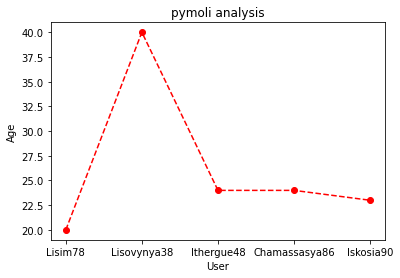

In [69]:
#importing matplotlib 
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
#taking an example from the homework pymoli data to plot a graph.
#I have added little more details to my plot such as marker, linestyle,color
ax.plot(purchase_data['SN'].head(),purchase_data['Age'].head(),marker='o',linestyle='--',color='r')
#specifying names for x axes and y axes
plt.xlabel('User')
plt.ylabel('Age')
#giving title to the plot
ax.set_title("pymoli analysis")
#displaying plot graph
plt.show()

!()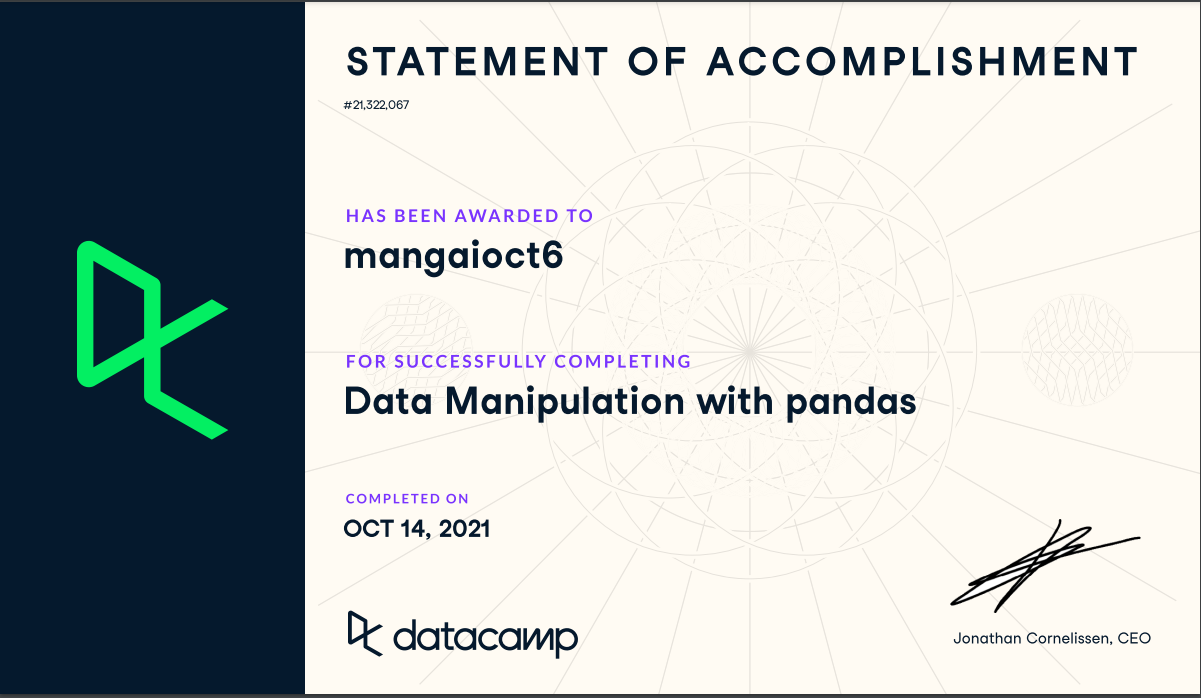[]